### Feature Engineering
#### Bridge between EDA and advanced modeling.

##### Load Data and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset
df = pd.read_csv("~/Desktop/whale-hotspots/data_synthetic_realistic.csv")

# Filling missing chlorophyll values
df["chlorophyll"].fillna(df["chlorophyll"].median(), inplace=True)

print("Data loaded")
df.head()

Data loaded


/var/folders/l2/p3fp1v2n08d1ygy1cmby6ycm0000gn/T/ipykernel_21606/49001059.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["chlorophyll"].fillna(df["chlorophyll"].median(), inplace=True)


,lat,lon,sst,chlorophyll,u,v,current_speed,presence_prob,presence
0,45.00,-66.5,9.248357,5.024581,0.050938,-0.000212,0.050938,0.110832,0
1,45.25,-66.5,9.130868,4.549750,0.003987,0.004994,0.006390,0.077033,1
2,45.50,-66.5,9.723844,5.127741,0.020363,0.004440,0.020842,0.306102,0
3,45.75,-66.5,10.361515,5.394606,0.041183,-0.003481,0.041330,0.520037,0
4,46.00,-66.5,9.682923,4.596085,0.018805,0.009854,0.021231,0.280856,0


##### Feature Engineering
We’ll add non-linear, interaction, and derived features that might better reflect real oceanographic behavior.

In [2]:
# Nonlinear transformations
df["sst2"] = df["sst"] ** 2
df["chlorophyll2"] = df["chlorophyll"] ** 2

# Interaction terms 
df["sst_chl"] = df["sst"] * df["chlorophyll"]
df["sst_u"] = df["sst"] * df["u"]
df["chl_v"] = df["chlorophyll"] * df["v"]

# Derived physical features
df["current_speed"] = np.sqrt(df["u"]**2 + df["v"]**2)
df["current_dir"] = np.arctan2(df["v"], df["u"])  # current direction (radians)

# Normalized (Z-scored) fields
for col in ["sst", "chlorophyll", "u", "v"]:
    df[col + "_z"] = (df[col] - df[col].mean()) / df[col].std()

print("Added engineered features:", df.shape[1], "columns")
df.head()

Added engineered features: 19 columns


,lat,lon,sst,chlorophyll,u,v,current_speed,presence_prob,presence,sst2,chlorophyll2,sst_chl,sst_u,chl_v,current_dir,sst_z,chlorophyll_z,u_z,v_z
0,45.00,-66.5,9.248357,5.024581,0.050938,-0.000212,0.050938,0.110832,0,85.532109,25.246411,46.469116,0.471092,-0.001065,-0.004160,-1.326801,2.635776,2.127702,0.232457
1,45.25,-66.5,9.130868,4.549750,0.003987,0.004994,0.006390,0.077033,1,83.372748,20.700225,41.543166,0.036405,0.022720,0.897028,-1.415953,2.268769,-1.119823,0.490743
2,45.50,-66.5,9.723844,5.127741,0.020363,0.004440,0.020842,0.306102,0,94.553147,26.293726,49.861353,0.198009,0.022767,0.214682,-0.965997,2.715510,0.012901,0.463272
3,45.75,-66.5,10.361515,5.394606,0.041183,-0.003481,0.041330,0.520037,0,107.360992,29.101774,55.896291,0.426721,-0.018778,-0.084322,-0.482126,2.921776,1.452992,0.070261
4,46.00,-66.5,9.682923,4.596085,0.018805,0.009854,0.021231,0.280856,0,93.759004,21.123997,44.503538,0.182091,0.045288,0.482647,-0.997048,2.304583,-0.094857,0.731878


##### Quick Correlation Check
We’ll make sure the new features have diversity and potential predictive signal.

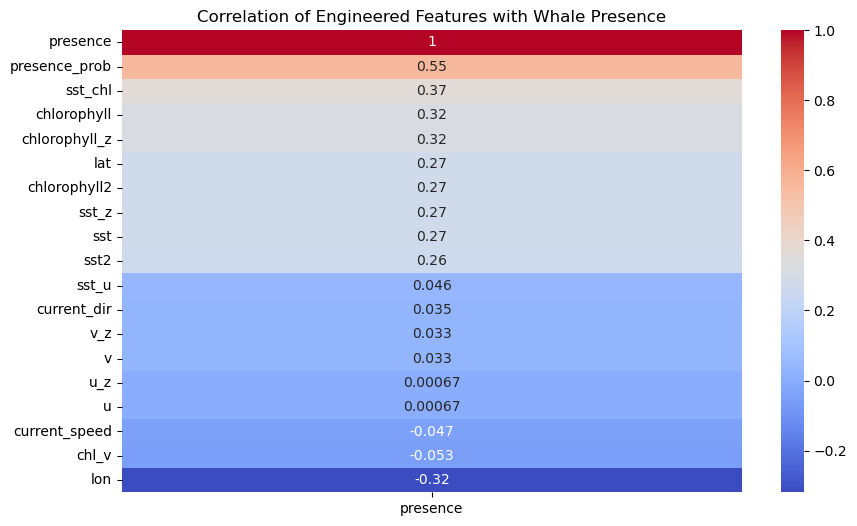

In [3]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr()["presence"].sort_values(ascending=False).to_frame(), annot=True, cmap="coolwarm")
plt.title("Correlation of Engineered Features with Whale Presence")
plt.show()

In [4]:
output_path = "~/Desktop/whale-hotspots/data_engineered.csv"
df.to_csv(output_path, index=False)
print(f"Feature-engineered dataset saved to: {output_path}")

Feature-engineered dataset saved to: ~/Desktop/whale-hotspots/data_engineered.csv
